# Analysis of the Data Extracted

The following code has the three analysis of the json files extracted from the PageViews API:

1. Maximum Average and Minimum Average
2. Top 10 Peak Page Views
3. Fewest Months of Data

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mobile_json = "json-data/academy_monthly_mobile_201507-202309.json"
desktop_json = "json-data/academy_monthly_desktop_201507-202309.json"
cumulative_json = "json-data/academy_monthly_cumulative_201507-202309.json"

# Read the JSON file
with open(mobile_json, 'r') as json_file:
    mobile_data = json.load(json_file)

with open(desktop_json, 'r') as json_file:
    desktop_data = json.load(json_file)

with open(cumulative_json, 'r') as json_file:
    cumulative_data = json.load(json_file)

### JSON to Pandas Dataframe

Converting a json file to a pandas dataframe would be easier wrt to creating graphs

In [3]:
# ------------ Defining a function to convert json to pd.dataframe ----------- #

def json_to_pd(json_data):
    flat_data = []

    for article, article_data in json_data.items():
        for item in article_data['items']:
            flat_data.append({
                'article': item['article'],
                'project': item['project'],
                'granularity': item['granularity'],
                'timestamp': item['timestamp'],
                'agent': item['agent'],
                'views': item['views']
            })

    df = pd.DataFrame(flat_data)

    return df

In [4]:
df_mobile = json_to_pd(mobile_data)
df_desktop = json_to_pd(desktop_data)
df_cumulative = json_to_pd(cumulative_data)

In [5]:
df_mobile.head()

,article,project,granularity,timestamp,agent,views
0,Everything_Everywhere_All_at_Once,en.wikipedia,monthly,2020010100,user,2306
1,Everything_Everywhere_All_at_Once,en.wikipedia,monthly,2020020100,user,5107
2,Everything_Everywhere_All_at_Once,en.wikipedia,monthly,2020030100,user,4547
3,Everything_Everywhere_All_at_Once,en.wikipedia,monthly,2020040100,user,9824
4,Everything_Everywhere_All_at_Once,en.wikipedia,monthly,2020050100,user,8109


In [6]:
df_desktop.head()

,article,project,granularity,timestamp,agent,views
0,Everything_Everywhere_All_at_Once,en.wikipedia,monthly,2020010100,user,1209
1,Everything_Everywhere_All_at_Once,en.wikipedia,monthly,2020020100,user,2944
2,Everything_Everywhere_All_at_Once,en.wikipedia,monthly,2020030100,user,2612
3,Everything_Everywhere_All_at_Once,en.wikipedia,monthly,2020040100,user,4530
4,Everything_Everywhere_All_at_Once,en.wikipedia,monthly,2020050100,user,3952


## Maximum Average and Minimum Average

The aim is to create a graph that contains time series for the articles that have the highest average monthly page requests and the lowest average monthly page requests for desktop access and mobile access. 

Steps for creating the graph:
1. Calculate the average of article views over all the available months
2. Sort the data to get names with maximum and minimum average views
3. Filter data containing only these articles obtained in the above step

In [7]:
# --------------- Calculating the Max and Min for Mobile Access -------------- #

mobile_grp_avg = df_mobile.groupby(by=['article']).agg({'views':'mean'}).reset_index()
mobile_grp_avg.columns = ['article','avg_views']
mobile_grp_avg = mobile_grp_avg.sort_values(by='avg_views', ascending=False)
min_article_mobile = mobile_grp_avg.iloc[-1,0]
max_article_mobile = mobile_grp_avg.iloc[0,0]

print('Minimum Mobile:', min_article_mobile)
print('Maximum Mobile:', max_article_mobile)

Minimum Mobile: Project_Hope_(film)
Maximum Mobile: The_Whale_(2022_film)


In [8]:
# --------------- Calculating the Max and Min for Desktop Access -------------- #

desktop_grp_avg = df_desktop.groupby(by=['article']).agg({'views':'mean'}).reset_index()
desktop_grp_avg.columns = ['article','avg_views']
desktop_grp_avg = desktop_grp_avg.sort_values(by='avg_views', ascending=False)
min_article_desktop = desktop_grp_avg.iloc[-1,0]
max_article_desktop = desktop_grp_avg.iloc[0,0]

print('Minimum Mobile:', min_article_desktop)
print('Maximum Mobile:', max_article_desktop)

Minimum Mobile: Project_Hope_(film)
Maximum Mobile: Joker_(2019_film)


/var/folders/9r/7q8l4tjd43z8stsvm3s_5g400000gn/T/ipykernel_43421/3659898529.py:25: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(nbins=10)


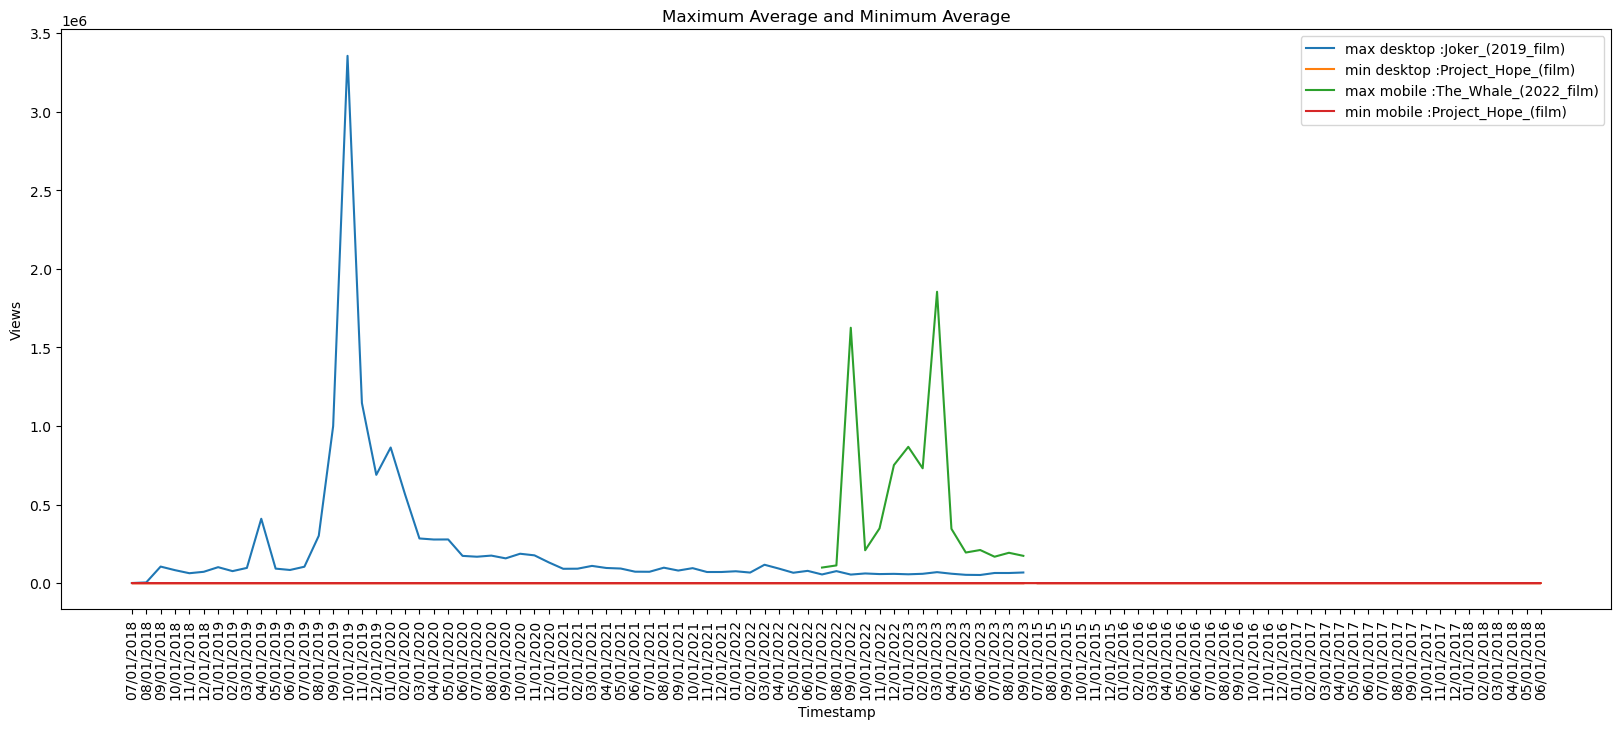

In [9]:
# --------------------- Time Series Plot for Max and Min --------------------- #

df_desktop['timestamp_1'] = df_desktop['timestamp'].apply(lambda x: str(x)[0:8])
df_desktop['timestamp_1'] = df_desktop['timestamp_1'].astype(int)
df_mobile['timestamp_1'] = df_mobile['timestamp'].apply(lambda x: str(x)[0:8])
df_mobile['timestamp_1'] = df_mobile['timestamp_1'].astype(int)

df_desktop['timestamp_1'] = pd.to_datetime(df_desktop['timestamp_1'], format='%Y%m%d').dt.strftime('%m/%d/%Y')
df_mobile['timestamp_1'] = pd.to_datetime(df_mobile['timestamp_1'], format='%Y%m%d').dt.strftime('%m/%d/%Y')

plt.figure(figsize = (20,10))
plt.plot(df_desktop[df_desktop['article'] == max_article_desktop].timestamp_1,\
         df_desktop[df_desktop['article'] == max_article_desktop].views, label = "max desktop :" + max_article_desktop)
plt.plot(df_desktop[df_desktop['article'] == min_article_desktop].timestamp_1,\
         df_desktop[df_desktop['article'] == min_article_desktop].views, label = "min desktop :" + min_article_desktop)
plt.plot(df_mobile[df_mobile['article'] == max_article_mobile].timestamp_1,\
         df_mobile[df_mobile['article'] == max_article_mobile].views, label = "max mobile :" + max_article_mobile)
plt.plot(df_mobile[df_mobile['article'] == min_article_mobile].timestamp_1,\
         df_mobile[df_mobile['article'] == min_article_mobile].views, label = "min mobile :" + min_article_mobile)


plt.xlabel('Timestamp')
plt.ylabel('Views')
plt.title('Maximum Average and Minimum Average')
plt.locator_params(nbins=10)
plt.legend()
plt.xticks(rotation ='vertical')
plt.subplots_adjust(bottom = 0.30)


# Save the plot as a png file
plt.savefig('result-images/1. Max and Min Avg.png')

## Top 10 Peak Page Views

 The aim is to create a graph that contains time series for the top 10 article pages by largest (peak) page views over the entire time by access type.

 Steps for creating the graph:

1. Calculate the max views of articles
2. Find the top 10
3. Plot the top 10 peak page views

In [10]:
#top 10 articles for dekstop
df_desktop['access']='desktop'
temp = df_desktop.groupby('article')['views'].transform('max') == df_desktop['views']
top_10_desktop=df_desktop[temp].sort_values(by='views',ascending=False).iloc[:10,:]
top_10_desktop

,article,project,granularity,timestamp,agent,views,timestamp_1,access
2393,Joker_(2019_film),en.wikipedia,monthly,2019100100,user,3355060,10/01/2019,desktop
1858,Parasite_(2019_film),en.wikipedia,monthly,2020020100,user,2813357,02/01/2020,desktop
3128,Black_Panther_(film),en.wikipedia,monthly,2018020100,user,2659906,02/01/2018,desktop
6898,The_Revenant_(2015_film),en.wikipedia,monthly,2016010100,user,2165430,01/01/2016,desktop
238,Avatar:_The_Way_of_Water,en.wikipedia,monthly,2022120100,user,1890048,12/01/2022,desktop
8075,Spectre_(2015_film),en.wikipedia,monthly,2015110100,user,1812832,11/01/2015,desktop
466,Dune_(2021_film),en.wikipedia,monthly,2021100100,user,1694498,10/01/2021,desktop
2518,1917_(2019_film),en.wikipedia,monthly,2020010100,user,1567798,01/01/2020,desktop
1585,Tenet_(film),en.wikipedia,monthly,2020090100,user,1565634,09/01/2020,desktop
4369,Blade_Runner_2049,en.wikipedia,monthly,2017100100,user,1517482,10/01/2017,desktop


In [11]:
#top 10 articles for mobile
df_mobile['access']='mobile'
temp = df_mobile.groupby('article')['views'].transform('max') == df_mobile['views']
top_10_mobile=df_mobile[temp].sort_values(by='views',ascending=False).iloc[:10,:]
top_10_mobile

,article,project,granularity,timestamp,agent,views,timestamp_1,access
238,Avatar:_The_Way_of_Water,en.wikipedia,monthly,2022120100,user,8106378,12/01/2022,mobile
2393,Joker_(2019_film),en.wikipedia,monthly,2019100100,user,8047344,10/01/2019,mobile
3128,Black_Panther_(film),en.wikipedia,monthly,2018020100,user,5503665,02/01/2018,mobile
1858,Parasite_(2019_film),en.wikipedia,monthly,2020020100,user,5484956,02/01/2020,mobile
178,Black_Panther:_Wakanda_Forever,en.wikipedia,monthly,2022110100,user,4634986,11/01/2022,mobile
403,RRR_(film),en.wikipedia,monthly,2022040100,user,4114488,04/01/2022,mobile
466,Dune_(2021_film),en.wikipedia,monthly,2021100100,user,3956760,10/01/2021,mobile
6898,The_Revenant_(2015_film),en.wikipedia,monthly,2016010100,user,3802421,01/01/2016,mobile
144,Top_Gun:_Maverick,en.wikipedia,monthly,2022060100,user,3784632,06/01/2022,mobile
38,Everything_Everywhere_All_at_Once,en.wikipedia,monthly,2023030100,user,3597067,03/01/2023,mobile


In [12]:
df_top10_mobile=df_mobile[df_mobile['article'].isin(list(top_10_mobile.article))]
df_top10_desktop=df_desktop[df_desktop['article'].isin(list(top_10_desktop.article))]

top_10_all_access=pd.concat([df_top10_mobile,df_top10_desktop],axis=0)
top_10_all_access.head()

,article,project,granularity,timestamp,agent,views,timestamp_1,access
0,Everything_Everywhere_All_at_Once,en.wikipedia,monthly,2020010100,user,2306,01/01/2020,mobile
1,Everything_Everywhere_All_at_Once,en.wikipedia,monthly,2020020100,user,5107,02/01/2020,mobile
2,Everything_Everywhere_All_at_Once,en.wikipedia,monthly,2020030100,user,4547,03/01/2020,mobile
3,Everything_Everywhere_All_at_Once,en.wikipedia,monthly,2020040100,user,9824,04/01/2020,mobile
4,Everything_Everywhere_All_at_Once,en.wikipedia,monthly,2020050100,user,8109,05/01/2020,mobile


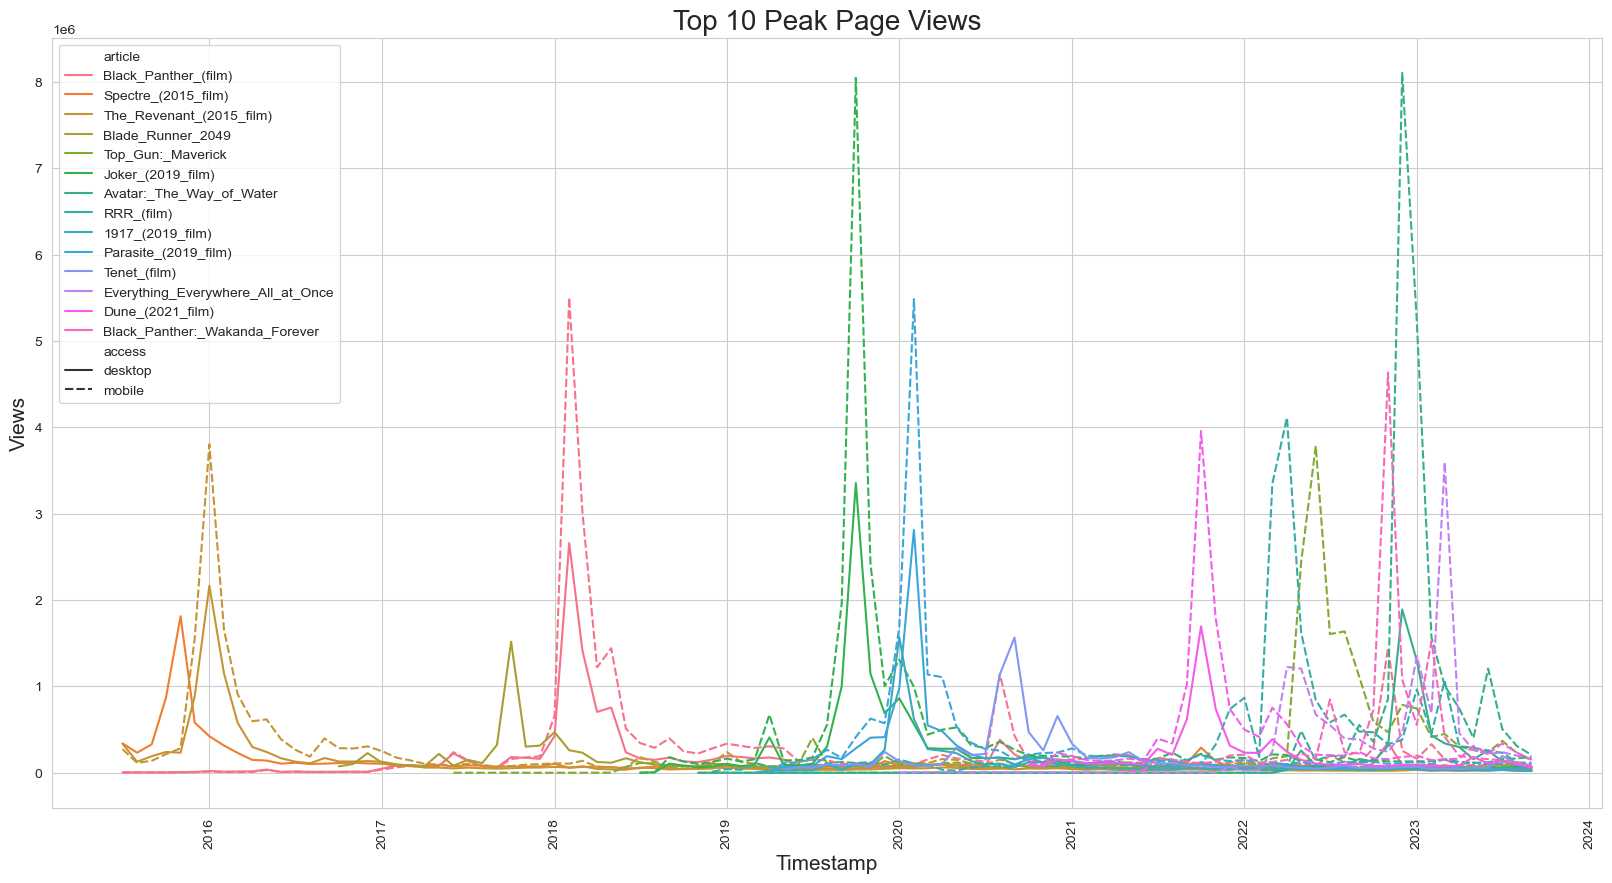

In [13]:
# Check for duplicate timestamps and aggregate them if necessary
# If this step is not done it throws an error
top_10_all_access['timestamp_1'] = pd.to_datetime(top_10_all_access['timestamp_1'], format='%m/%d/%Y')
top_10_all_access = top_10_all_access.groupby(['timestamp_1', 'article', 'access']).agg({'views': 'sum'}).reset_index()

# Create the plot
plt.figure(figsize=(20, 10))
sns.set_style("whitegrid")

sns.lineplot(x='timestamp_1', y='views',
             ci=None, hue='article', style='access',
             data = top_10_all_access)
plt.title("Top 10 Peak Page Views", fontsize=20)
plt.xlabel("Timestamp", fontsize=15)
plt.ylabel("Views", fontsize=15)
plt.xticks(rotation='vertical')
plt.legend()

# Save the plot as a png file
plt.savefig('result-images/2. Top 10 Peak Views.png')

plt.show()


## Fewest Months of Data

 The aim is to create a graph that contains pages that have the fewest months of available data. These will all be relatively short time series and should contain a set of the most recent academy award winners. 

Steps for creating the graph:

1. Calculate the count of months for which data is available for each article
2. Get the top 10 articles that have the fewest months of data
3. Filter data containing only these articles obtained in the above step

In [14]:
#Fewest months of data
mobile_2c = df_mobile.groupby(by=['article']).agg({'timestamp':'nunique'}).reset_index()
mobile_2c.columns = ['article','months_count']
mobile_2c = mobile_2c.sort_values(by='months_count').iloc[:10]
mobile_2c

,article,months_count
936,"The_Boy,_the_Mole,_the_Fox_and_the_Horse_(film)",10
983,The_Elephant_Whisperers,10
1335,Women_Talking_(film),11
329,Eskimo_(1933_film),12
1213,The_Whale_(2022_film),15
959,The_Critic_(1963_film),15
1215,The_Windshield_Wiper,20
1138,The_Queen_of_Basketball,20
660,Navalny_(film),21
415,Guillermo_del_Toro's_Pinocchio,21


In [15]:
#Fewest months of data
desktop_2c = df_desktop.groupby(by=['article']).agg({'timestamp':'nunique'}).reset_index()
desktop_2c.columns=['article','months_count']
desktop_2c=desktop_2c.sort_values(by='months_count').iloc[:10]
desktop_2c

,article,months_count
936,"The_Boy,_the_Mole,_the_Fox_and_the_Horse_(film)",10
983,The_Elephant_Whisperers,10
1335,Women_Talking_(film),11
329,Eskimo_(1933_film),12
1213,The_Whale_(2022_film),15
959,The_Critic_(1963_film),15
1215,The_Windshield_Wiper,20
1138,The_Queen_of_Basketball,20
660,Navalny_(film),21
415,Guillermo_del_Toro's_Pinocchio,21


In [16]:
df_min_mths_desktop = df_desktop[df_desktop['article'].isin(list(desktop_2c.article))]
df_min_mths_mobile = df_mobile[df_mobile['article'].isin(list(mobile_2c.article))]

few_months_all_access = pd.concat([df_min_mths_desktop,df_min_mths_mobile],axis=0)
few_months_all_access.head()

,article,project,granularity,timestamp,agent,views,timestamp_1,access
69,The_Whale_(2022_film),en.wikipedia,monthly,2022070100,user,28302,07/01/2022,desktop
70,The_Whale_(2022_film),en.wikipedia,monthly,2022080100,user,41066,08/01/2022,desktop
71,The_Whale_(2022_film),en.wikipedia,monthly,2022090100,user,390423,09/01/2022,desktop
72,The_Whale_(2022_film),en.wikipedia,monthly,2022100100,user,78216,10/01/2022,desktop
73,The_Whale_(2022_film),en.wikipedia,monthly,2022110100,user,196501,11/01/2022,desktop


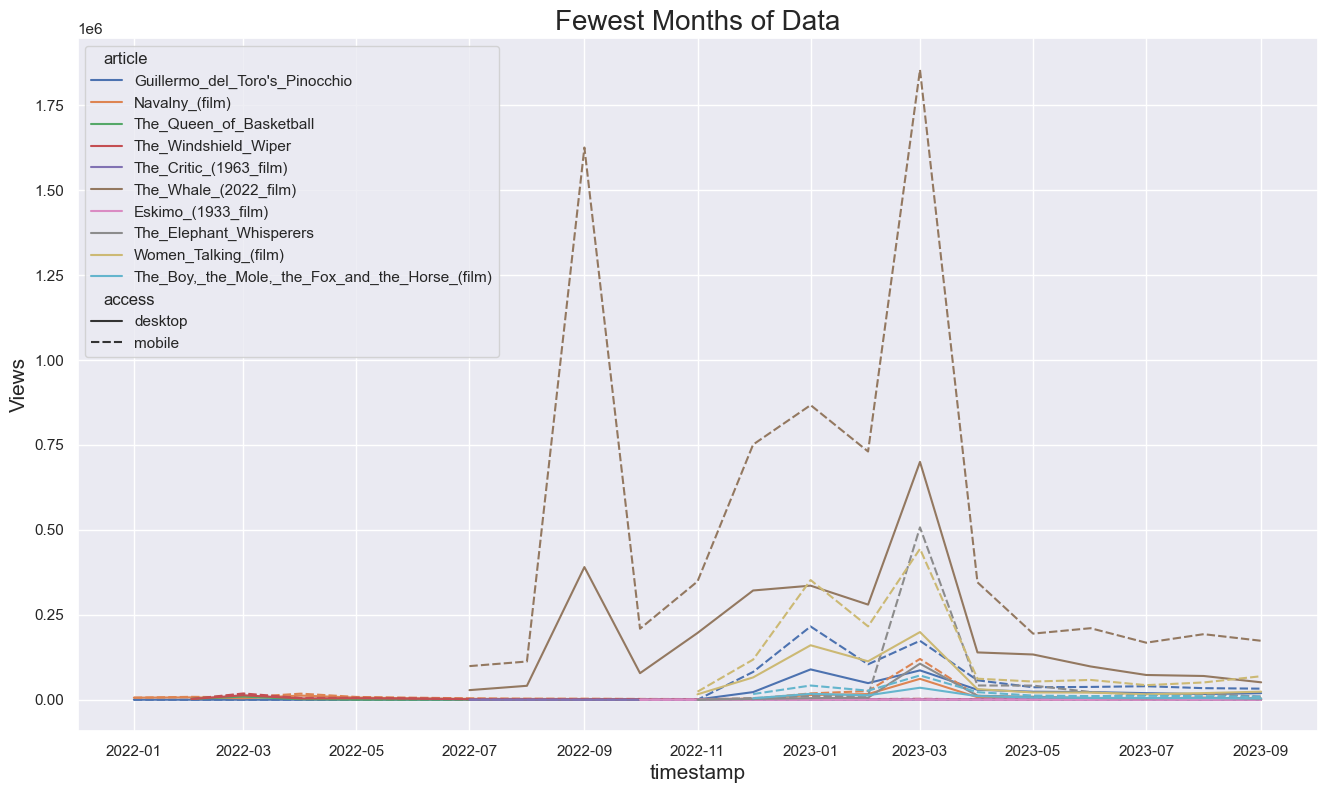

In [18]:
# Check for duplicate timestamps and aggregate them if necessary
# If this step is not done it throws an error
few_months_all_access['timestamp_1'] = pd.to_datetime(few_months_all_access['timestamp_1'], format='%m/%d/%Y')
few_months_all_access = few_months_all_access.groupby(['timestamp_1', 'article', 'access']).agg({'views': 'sum'}).reset_index()

plt.figure(figsize = (16,9))
sns.set(style='darkgrid',)
sns.lineplot(x='timestamp_1', y='views',
             ci=None,hue='article',style='access',
             data = few_months_all_access,legend='brief')
plt.title("Fewest Months of Data", fontsize = 20)
plt.xlabel("timestamp", fontsize = 15)
plt.ylabel("Views", fontsize = 15)


# Save the plot as a png file
plt.savefig('result-images/3. Fewest Months of Data.png')

plt.show()